test code for building an algorithm to identify all superblocks in a directed graph.

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import scipy.integrate as integrate 
from scipy.optimize import minimize_scalar
import matplotlib.pyplot as plt
from scipy.misc import derivative

In [2]:
def graph_w_superblock(graph, list_center, list_outside, seed, name):
    # Prepare node colors
    node_colors = []
    for node in graph.nodes():
        if node in list_center:
            node_colors.append('green')
        elif node in list_outside:
            node_colors.append('purple') 
        else:
            node_colors.append('blue')

    # Generate a layout
    pos = nx.spring_layout(graph, scale=2, seed = seed, dim = 2)
    # pos = nx.spring_layout(graph, scale=2, seed = 42)

    # Set figure size
    plt.figure(figsize=(8, 5))
    # plt.figure(figsize=(10, 10))
    # plt.figure(figsize=(20, 20))

    # Draw the graph with specified node colors
    nx.draw_networkx(graph, pos, arrows=True, node_size=20, width=0.1, with_labels=False, alpha=0.7, node_color=node_colors)

    # Adjust plot
    plt.axis('off')

    if len(name) > 1:
        plt.savefig('/home/clarice/Documents/VSCode/Term2_Networks/final_project/'+name+'.jpeg')

    plt.show()

In [3]:
#used in the identify superblocks code
def common_rmv_round(graph, neighbors_node_, common_node):
    for node_ in neighbors_node_:
        neighbors_node__ = list(graph.neighbors(node_))
        for node_common in common_node:
            if node_common in neighbors_node__:
                common_node.append(node_)
                common_node = list(set(list(common_node)))
                if node_ in neighbors_node_:
                    neighbors_node_.remove(node_)        
    return neighbors_node_, common_node


#function that identifies superblocks in an undirected graph
def identify_superblocks(graph_directed):
    graph = nx.Graph(graph_directed)
    list_nodes = list(graph.nodes)

    dict_blocks = {}
    iter_ = 0

    for node_i in list_nodes:
        # for node_i in list_nodes:
        neighbors_i = list(graph.neighbors(node_i))
        neighbors_i_ = list(graph.neighbors(node_i))
        nodes_common = []
        for node_j in neighbors_i:
            neighbors_j = list(graph.neighbors(node_j))
            neighbors_j.remove(node_i)
            neighbors_i_.remove(node_j)
            #make sure that you remove common neighbors in neighbors_j
            for node_j_ in neighbors_i:
                if node_j != node_j_:
                    neighbors_j_ = list(graph.neighbors(node_j_))
                    for element in neighbors_j_:
                        if element in neighbors_j:
                            neighbors_j.remove(element)
                            nodes_common.append(element)
                            nodes_common = list(set(list(nodes_common)))
            #continue to next node
            for node_k in neighbors_j:
                neighbors_k = list(graph.neighbors(node_k))
                neighbors_k.remove(node_j)
                #remove common neighbors
                neighbors_k, nodes_common = common_rmv_round(graph, neighbors_k, nodes_common)
                for node_l in neighbors_k:
                    neighbors_l = list(graph.neighbors(node_l))
                    neighbors_l.remove(node_k)
                    #now we have (node_i, node_j, node_k, node_l)
                    #go to row 2
                    for node_m in neighbors_i_:
                        #we don't want node_j to equal node_m
                        neighbors_m = list(graph.neighbors(node_m))
                        neighbors_m.remove(node_i)
                        for node_n in neighbors_m:
                            neighbors_n = list(graph.neighbors(node_n))
                            neighbors_n.remove(node_m)
                            for node_o in neighbors_n:
                                if node_o != node_j:
                                    neighbors_o = list(graph.neighbors(node_o))
                                    neighbors_o.remove(node_n)
                                    for node_p in neighbors_o:
                                        if node_p != node_k:
                                            neighbors_p = list(graph.neighbors(node_p))
                                            neighbors_p.remove(node_o)
                                            #now we have (node_m, node_n, node_o, node_p)
                                            #if first row is connected to second row
                                            if (node_j in neighbors_n)&(node_k in neighbors_o)&(node_l in neighbors_p):
                                                #continue to third row
                                                for node_q in neighbors_m:
                                                    neighbors_q = list(graph.neighbors(node_q))
                                                    neighbors_q.remove(node_m)
                                                    for node_r in neighbors_q:
                                                        neighbors_r = list(graph.neighbors(node_r))
                                                        neighbors_r.remove(node_q)
                                                        for node_s in neighbors_r:
                                                            if node_s != node_n:
                                                                neighbors_s = list(graph.neighbors(node_s))
                                                                neighbors_s.remove(node_r)
                                                                for node_t in neighbors_s:
                                                                    if node_t !=node_o:
                                                                        neighbors_t = list(graph.neighbors(node_t))
                                                                        neighbors_t.remove(node_s)
                                                                        if (node_n in neighbors_r)&(node_o in neighbors_s)&(node_p in neighbors_t):
                                                                            #now we have (node_q, node_r, node_s, node_t)
                                                                            # print("third row",node_q, node_r, node_s, node_t)
                                                                            for node_w in neighbors_q:
                                                                                neighbors_w = list(graph.neighbors(node_w))
                                                                                neighbors_w.remove(node_q)
                                                                                for node_x in neighbors_w:
                                                                                    neighbors_x = list(graph.neighbors(node_x))
                                                                                    neighbors_x.remove(node_w)
                                                                                    for node_y in neighbors_x:
                                                                                        neighbors_y = list(graph.neighbors(node_y))
                                                                                        neighbors_y.remove(node_x)
                                                                                        for node_z in neighbors_y:
                                                                                            if node_z != node_s:
                                                                                                neighbors_z = list(graph.neighbors(node_z))
                                                                                                neighbors_z.remove(node_y)
                                                                                                if (node_r in neighbors_x)&(node_s in neighbors_y)&(node_t in neighbors_z):
                                                                                                    #document all the nodes                                                                
                                                                                                    list_center = [node_n, node_o, node_r, node_s]
                                                                                                    list_corner = [node_i, node_l, node_w, node_z]
                                                                                                    list_outside = [node_i, node_j, node_k, node_l, node_m, node_p, node_q, node_t, node_w, node_x, node_y, node_z]

                                                                                                    list_center.sort()
                                                                                                    list_corner.sort()
                                                                                                    list_outside.sort()

                                                                                                    #make sure no duplicate nodes    
                                                                                                    list_center = list(set(list_center))
                                                                                                    list_outside = list(set(list_outside))

                                                                                                    #check that all nodes are degree 4
                                                                                                    all_nodes_degree4 = 0
                                                                                                    # for node in list_outside:
                                                                                                    #     if graph.degree[node] > 3:
                                                                                                    #         all_nodes_degree4 += 1
                                                                                                    for node in list_center:
                                                                                                        if graph.degree[node] == 4:
                                                                                                            all_nodes_degree4 += 1
                                                                                                    
                                                                                                    if all_nodes_degree4 == 4:
                                                                                                        # print("all nodes are degree 4")
                                                                                                        #check to make sure that the same graph isn't being added again
                                                                                                        are_equal = 0
                                                                                                        for prev in dict_blocks.keys():
                                                                                                            if (dict_blocks[prev][0] == list_center)&(dict_blocks[prev][2] == list_outside):
                                                                                                                are_equal += 1
                                                                                                        if are_equal == 0:
                                                                                                            #add the new superblock to the dictionary
                                                                                                            # print(iter_)
                                                                                                            dict_blocks[iter_] = [list_center, list_corner, list_outside]
                                                                                                            iter_ += 1
    print("Number of superblocks",len(dict_blocks.keys()))
    return dict_blocks

In [4]:
graph = nx.Graph()

for node in range(1,37):
    graph.add_node(node)

print("-----------------")

for to_ in range(2,7):
    from_ = int(to_ - 1)
    graph.add_edge(from_, to_)
    graph.add_edge(from_, from_+6)
    graph.add_edge(from_+6, to_+6)
    graph.add_edge(from_+6, from_+12)
    graph.add_edge(from_+12, to_+12)
    graph.add_edge(from_+12, from_+18)
    graph.add_edge(from_+18, to_+18)
    graph.add_edge(from_+18, from_+24)
    graph.add_edge(from_+24, to_+24)
    graph.add_edge(from_+24, from_+30)
    graph.add_edge(from_+30, to_+30)

list_add = [(6,12),(12,18),(18,24),(24,30),(30,36)]
for edge in list_add:
    graph.add_edge(*edge)

-----------------


In [5]:
graph.edges

EdgeView([(1, 2), (1, 7), (2, 3), (2, 8), (3, 4), (3, 9), (4, 5), (4, 10), (5, 6), (5, 11), (6, 12), (7, 8), (7, 13), (8, 9), (8, 14), (9, 10), (9, 15), (10, 11), (10, 16), (11, 12), (11, 17), (12, 18), (13, 14), (13, 19), (14, 15), (14, 20), (15, 16), (15, 21), (16, 17), (16, 22), (17, 18), (17, 23), (18, 24), (19, 20), (19, 25), (20, 21), (20, 26), (21, 22), (21, 27), (22, 23), (22, 28), (23, 24), (23, 29), (24, 30), (25, 26), (25, 31), (26, 27), (26, 32), (27, 28), (27, 33), (28, 29), (28, 34), (29, 30), (29, 35), (30, 36), (31, 32), (32, 33), (33, 34), (34, 35), (35, 36)])

In [7]:
dict_dist = identify_superblocks(graph)
print("number of blocks",len(dict_dist.keys()))
for block in dict_dist.keys():
    print("block-------",block)
    print("center nodes",dict_dist[block][0])
    print("corner nodes",dict_dist[block][1])
    print("outside nodes",dict_dist[block][2])

Number of superblocks 9
number of blocks 9
block------- 0
center nodes [8, 9, 14, 15]
corner nodes [1, 4, 19, 22]
outside nodes [1, 2, 3, 4, 7, 10, 13, 16, 19, 20, 21, 22]
block------- 1
center nodes [16, 9, 10, 15]
corner nodes [2, 5, 20, 23]
outside nodes [2, 3, 4, 5, 8, 11, 14, 17, 20, 21, 22, 23]
block------- 2
center nodes [16, 17, 10, 11]
corner nodes [3, 6, 21, 24]
outside nodes [3, 4, 5, 6, 9, 12, 15, 18, 21, 22, 23, 24]
block------- 3
center nodes [20, 21, 14, 15]
corner nodes [7, 10, 25, 28]
outside nodes [7, 8, 9, 10, 13, 16, 19, 22, 25, 26, 27, 28]
block------- 4
center nodes [16, 21, 22, 15]
corner nodes [8, 11, 26, 29]
outside nodes [8, 9, 10, 11, 14, 17, 20, 23, 26, 27, 28, 29]
block------- 5
center nodes [16, 17, 22, 23]
corner nodes [9, 12, 27, 30]
outside nodes [9, 10, 11, 12, 15, 18, 21, 24, 27, 28, 29, 30]
block------- 6
center nodes [26, 27, 20, 21]
corner nodes [13, 16, 31, 34]
outside nodes [32, 33, 34, 13, 14, 15, 16, 19, 22, 25, 28, 31]
block------- 7
center no

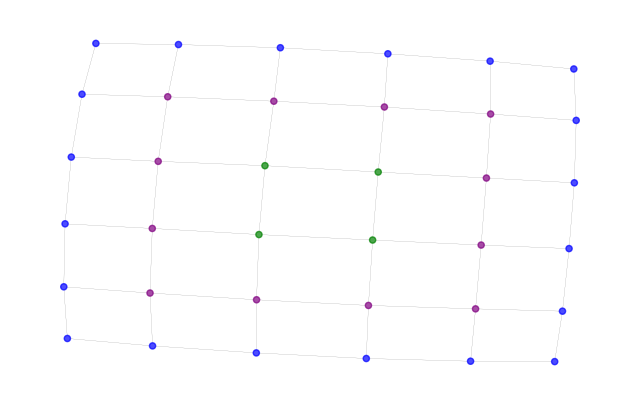

In [15]:
list_center = [16, 21, 22, 15]
list_outside = [8, 9, 10, 11, 14, 17, 20, 23, 26, 27, 28, 29]

graph_w_superblock(graph, list_center, list_outside, 4, 'superblock_simple_example')

#41 is square